### Exercise 1
On the same plot, graph the functions y=sin(x), y=cos(x), and y={x2 ,x≥0	0,x<0} on the interval [−2π,2π].

1. Make the curves have different colors
1. Give the curves different sizes and linestyles
1. Add a legend and label each curve appropriately
1. Label the x and y axes
1. Give the plot a title

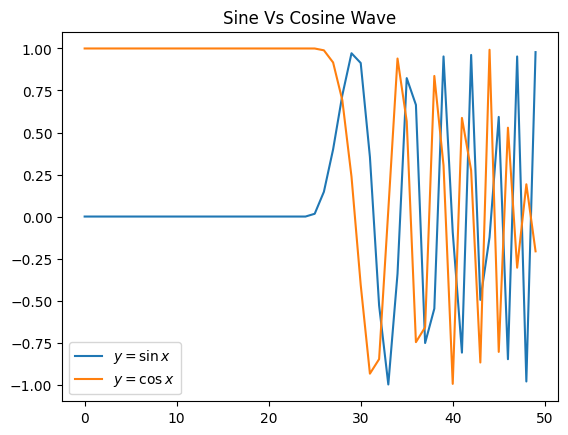

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
x = np.linspace((-2*np.pi), (2*np.pi))

pwise = np.piecewise(x, [x >= 0, x < 0], [lambda x : x**2,lambda x : 0])

sine=np.sin(pwise)
cosine=np.cos(pwise)

fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(sine,label='$y=\sin{x}$')
axes.plot(cosine,label = "$y=\cos{x}$")
axes.legend(loc=3)



axes.set_title("Sine Vs Cosine Wave")
plt.show()

# Exercise 2
Plot the 2-variable function 
sin
(
10(x^2+y^2))/10 for x ∈[−1,1] and y∈[−1,1]

1. Using a contour plot
1. Using a surface plot as we did in lecture
1. Plot the surface from 3 different viewing angles and comment on what you see
1. For each plot, use a different colormap

(50,)


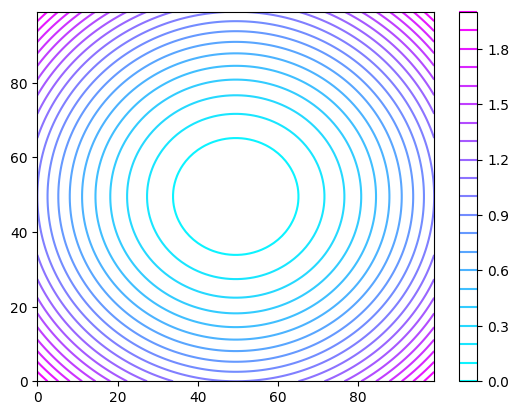

In [54]:
x = np.linspace(-1,1,num=100)
y = np.linspace(-1,1,num=100)
x,y = np.meshgrid(x,y)

z = 10*((x**2+y**2))/10
zsine = np.sin(z)
fig,axes = plt.subplots()
color = plt.cm.cool
cont = axes.contour(z,cmap=color,levels=20)
fig.colorbar(cont,ax=axes)
print(sine.shape)


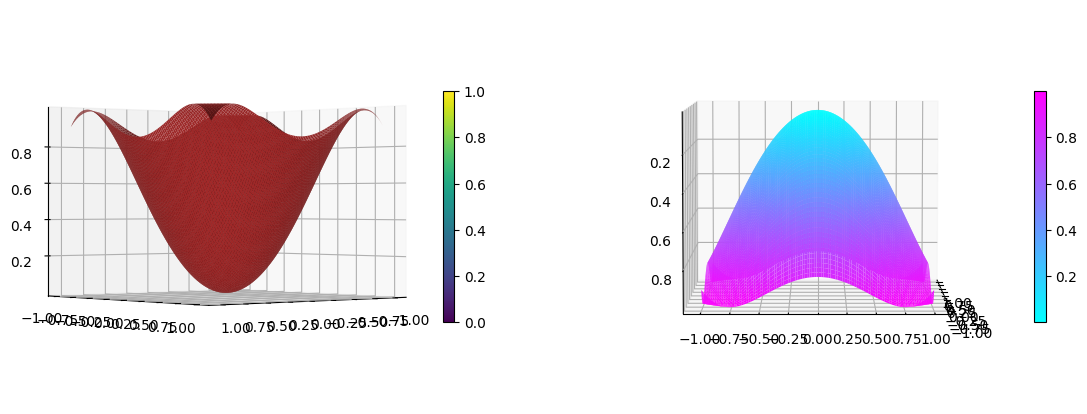

In [55]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize = (14,6))
                 
ax = fig.add_subplot(1,2,1, projection = '3d')
p = ax.plot_surface(x,y,zsine,color='brown',rstride=1,cstride=1,antialiased=True)#,rstride=4,cstride=4,linewidth=0)
ax.view_init(0,50)
cb = fig.colorbar(p,shrink=0.5)
#For this first one, I made it '2.5D' and im able to clearly see the sine wave, as well as the shape of the curve

ax = fig.add_subplot(1,2,2,projection='3d')
p = ax.plot_surface(x,y,zsine,cmap = color,rstride=1,cstride=1,antialiased=True)#,rstride=1,cstride=1,cmap = color,antialiased=True)
ax.view_init(-175,0)
cb = fig.colorbar(p,shrink=0.5)
#I now see the shape of the curve resembles a bell curve. This could be due to my linspace function




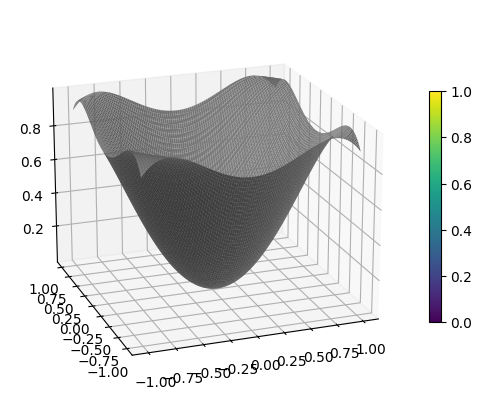

In [51]:
fig = plt.figure(figsize = (14,6))

ax = fig.add_subplot(1,2,2,projection='3d')
p = ax.plot_surface(x,y,zsine,color= 'gray',rstride=1,cstride=1,antialiased=True)#,rstride=1,cstride=1,cmap = color,antialiased=True)
ax.view_init(20,250)
cb = fig.colorbar(p,shrink=0.5)
#In an isometric view, you get to see more clearly where the sine wave alters the bell curve to create 'corners' where the data peaks height wise. There seems to be a densely uniformed sample that is being imposed upon by the sine function.


# Exercise 3
Consider that a person is standing on the real line at a given point X_0. The person then goes on a "random walk", meaning that they first take a step of size 1 in a random direction (so after this step they are either standing at x_0+1 or x_0-1 ), then they take another step of size 1 in a random direction (after the second step they are standing at one of x_0-2 or x_0+2 ), and they continue this process for n steps. At each stage, the person flips a fair coin to decide which direction to go in.


   1. Write a function RandomWalk(num_steps,start_position), that takes the number of steps num_steps for a random walk and the start_position of the random walk on the real line (so a float), and returns the location of the final step of the random walker.
   
   
   1. Write another function SimulateRandomWalk(num_sims,num_steps,start_position) that simulates num_sims number of random walks, each of which contains num_steps steps and starts at start_position. Then, this function calls RandomWalk() repeatedly for num_sims times and finally returns a vector of size num_sim containing the final locations of all of the num_sims simulated random-walks.
   
   
   1. Now write a script that plots the output of SimulateRandomWalk(num_sims = 10000, num_steps = 100, start_position = 0) in a histogram
   
   
   1. Repeat step 3 for num_steps = 1000, 5000
   1. Interpret your results


In [56]:
def RandomWalk(num_steps,start_position):
    
    for i in range(num_steps):
        pick_step = np.random.randint(0,2)
        if pick_step == 1:
            start_position += 1
        elif pick_step == 0:
            start_position += -1
    return start_position

def SimulateRandomWalk(numsims,num_steps,start_position):
    step_shape = []
    
    for i in range(numsims):
        steps = RandomWalk(num_steps,start_position)
        step_shape.append(steps)
        path = np.array([step_shape])
        
    return path

RandomWalk(1000,0)
path= SimulateRandomWalk(100,100,0)


#plt.hist(SimulateRandomWalk,bins=15)
    

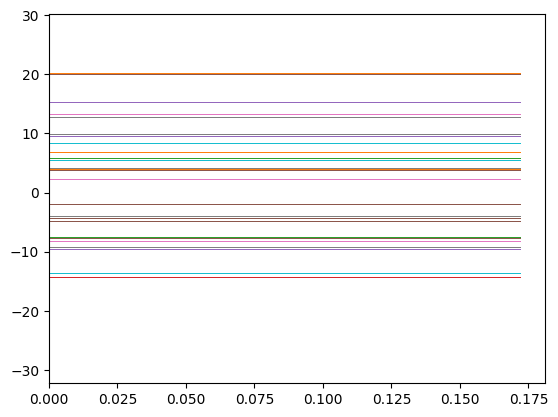

In [58]:
#my computer cant run numsims>100 
path= SimulateRandomWalk(1000,100,0)
plt.hist(path, bins=10, density=True,histtype='bar', orientation='horizontal')
plt.show()

# Interpret
Based on 100 simulations of 100 walks, I can see that the Central Limit Theory, as well as the law of large numbers, is at play in how the results of the data plays out. It is evident that the more simulations are ran, the denser the data packs around the center, with  of this data follo